#### Importing all the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### fetching data from the url

In [3]:
url = 'http://bit.ly/w-data'
Data_set = pd.read_csv(url)

In [4]:
# viewing the data
Data_set.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Graphical View of the Data set with Matplotlib

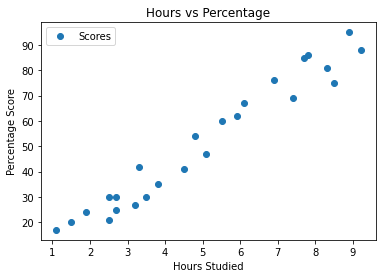

In [5]:
Data_set.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
Data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Converting the data to numpy array

In [7]:
X = Data_set.iloc[:, 0].values.reshape(-1, 1)  
y = Data_set.iloc[:, 1].values.reshape(-1, 1)


#### Spliting the Data into Train and test sets

In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#### Using the Linear regression model from the sklearn library 

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

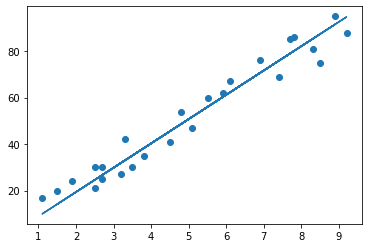

In [11]:
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Prediction on the test set

In [12]:
y_hat = lr.predict(X_test)

In [13]:
# Since the array is multi dimentional we need to make it into a single dimention
y_hat = y_hat.ravel()
y_test = y_test.ravel()
print(y_hat)
print(y_test)

[ 9.97026179 32.98470004 18.33914843 87.38246316 48.67636248]
[17 42 24 75 54]


In [14]:
dict1 = {'Actual': y_test, 'Predicted': y_hat}
df = pd.DataFrame(dict1)  
df 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat)) 

Mean Absolute Error: 7.882398086270432


### Root square mean shoud be close to one this shows the model is doing great

In [16]:
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_hat,y_test))

R2 Score: 0.9078927122875521


### Testing with own Data

In [ ]:
study_hours = [[8.5]]

y_pred = lr.predict(study_hours)
print(f"No of Hours = {study_hours}")
print(f"Predicted Score = {y_pred[0]}")